# Analysis of best oyo hotels based on their prices, ratings & offers:-

## Importing the required  Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## Concatinating all the cites dataframes which are crated before & saved in .csv format

In [3]:
df0 = pd.read_csv('Oyo Hotels Hyderabad.csv')
df2 = pd.read_csv('Oyo Hotels Goa.csv')
df3 = pd.read_csv('Oyo Hotels Mumbai.csv')
df4 = pd.read_csv('Oyo Hotels Nagpur.csv')
df5 = pd.read_csv('Oyo Hotels Delhi.csv')
df6 = pd.read_csv('Oyo Hotels Bangalore.csv')
df7 = pd.read_csv('Oyo Hotels Chennai.csv')
df8 = pd.read_csv('Oyo Hotels Kolkata.csv')
df9 = pd.read_csv('Oyo Hotels Lucknow.csv')

In [4]:
frames = [df0, df2, df3,df6, df4, df5,df7, df8, df9]
Hotels_df = pd.concat(frames)

## Final dataframe:

In [5]:
Hotels_df.head()

,Hotels,Prices,Total_Price,Ratings,Booking_Discounts(%),Reviews,Facilities,Address,Informations,City_Name
0,Townhouse OAK Hotel Belsons Taj Mahal,1793.0,6404.0,4.176812,72.0,189.0,Doctor on call,"Near Swapnalok Complex, Patny Centre, Hyderabad",10 people booked this hotel in last 6 hours,Hyderabad
1,Capital O 86948 Hotel Sai Balaji,1040.0,2972.0,4.200000,65.0,987.0,Reception,"Rajendra Nagar Suncity Hyderabad, Hyderabad",1k+ people booked this OYO in last 6 months,Hyderabad
2,Flagship 76655 Goldhorn Hotels Mehdipatnam,1595.0,5697.0,4.100000,72.0,1915.0,Living Room,"Mehdipatnam, Hyderabad",8 people booked this hotel in last 6 hours,Hyderabad
3,OYO 70857 Dream Suites,1474.0,5264.0,4.176812,72.0,1414.0,Reception,"Near kphb metro station, Kukatpally, Hyderabad",All staff vaccinated with 1st dose,Hyderabad
4,Capital O 700516 S V Residency Nalagandla,732.0,2614.0,4.176812,72.0,73.0,Doctor on call,"Nalagandla, Hyderabad",7 people booked this hotel in last 6 hours,Hyderabad


## Data cleaning:

### Checking duplicates in the dataframe

In [6]:
Hotels_df.duplicated().sum()

146

In [7]:
Hotels_df.drop_duplicates(keep='first',inplace=True)
Hotels_df.duplicated().sum()

0

In [8]:
Hotels_df.columns

Index(['Hotels', 'Prices', 'Total_Price', 'Ratings', 'Booking_Discounts(%)',
       'Reviews', 'Facilities', 'Address', 'Informations', 'City_Name'],
      dtype='object')

In [9]:
Hotels_df.shape

(2051, 10)

### Data's from nine different cities which are:

In [10]:
Hotels_df['City_Name'].unique()

array(['Hyderabad', 'Goa', 'Mumbai', 'Bangalore', 'Nagpur', 'Delhi',
       'Chennai', 'Kolkata', 'Lucknow'], dtype=object)

### Giving int unit tag to numerical columns:

In [11]:
Hotels_df['Total_Price'] = Hotels_df['Total_Price'].astype(int)
Hotels_df['Prices'] = Hotels_df['Prices'].astype(int)

In [12]:
Hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotels                2050 non-null   object 
 1   Prices                2051 non-null   int32  
 2   Total_Price           2051 non-null   int32  
 3   Ratings               2051 non-null   float64
 4   Booking_Discounts(%)  2051 non-null   float64
 5   Reviews               2051 non-null   float64
 6   Facilities            2047 non-null   object 
 7   Address               2050 non-null   object 
 8   Informations          1309 non-null   object 
 9   City_Name             2051 non-null   object 
dtypes: float64(3), int32(2), object(5)
memory usage: 160.2+ KB


### Applying lambda function to round off the values in Ratings & Booking_Discounts columns:

In [13]:
Hotels_df.Ratings=Hotels_df.Ratings.apply(lambda x: round(x,2) )
Hotels_df['Booking_Discounts(%)']=Hotels_df['Booking_Discounts(%)'].apply(lambda x: round(x,2) )
Hotels_df

,Hotels,Prices,Total_Price,Ratings,Booking_Discounts(%),Reviews,Facilities,Address,Informations,City_Name
0,Townhouse OAK Hotel Belsons Taj Mahal,1793,6404,4.18,72.00,189.0,Doctor on call,"Near Swapnalok Complex, Patny Centre, Hyderabad",10 people booked this hotel in last 6 hours,Hyderabad
1,Capital O 86948 Hotel Sai Balaji,1040,2972,4.20,65.00,987.0,Reception,"Rajendra Nagar Suncity Hyderabad, Hyderabad",1k+ people booked this OYO in last 6 months,Hyderabad
2,Flagship 76655 Goldhorn Hotels Mehdipatnam,1595,5697,4.10,72.00,1915.0,Living Room,"Mehdipatnam, Hyderabad",8 people booked this hotel in last 6 hours,Hyderabad
3,OYO 70857 Dream Suites,1474,5264,4.18,72.00,1414.0,Reception,"Near kphb metro station, Kukatpally, Hyderabad",All staff vaccinated with 1st dose,Hyderabad
4,Capital O 700516 S V Residency Nalagandla,732,2614,4.18,72.00,73.0,Doctor on call,"Nalagandla, Hyderabad",7 people booked this hotel in last 6 hours,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
208,OYO 85551 Hotel Rudra Palace,854,2866,4.19,69.38,542.0,Parking facility,"226023, Lucknow",900+ people booked this OYO in last 6 months,Lucknow
209,Flagship 79156 Hotel Tokyo,854,2866,4.30,69.38,452.0,Doctor on call,1/1000 Vinay Khand (patrakarpuram) Near Malik ...,All staff vaccinated with 1st dose,Lucknow
210,Flagship 92692 Star Stay Guest House,854,2866,4.19,69.38,165.0,Parking facility,Star Tower Aliganj Opp Kendriya Bhawan Lucknow...,NaN,Lucknow
211,Capital O 84117 The Diamond Night Inn,854,2866,4.19,69.38,287.0,Doctor on call,"Gomti Nagar, Lucknow",6 people booked this hotel in last 6 hours,Lucknow


## Descriptive stats:

In [14]:
Hotels_df.describe()

,Prices,Total_Price,Ratings,Booking_Discounts(%),Reviews
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1200.120917,3866.316431,4.168908,68.620444,678.330706
std,700.154451,2072.401411,0.060996,4.679419,841.387384
min,0.000000,1292.000000,4.000000,44.000000,1.000000
25%,751.500000,2528.500000,4.150000,65.000000,113.000000
50%,1008.000000,3216.000000,4.170000,68.990000,431.000000
75%,1357.500000,4369.000000,4.190000,72.000000,847.500000
max,7924.000000,18148.000000,4.400000,90.000000,8221.000000


### Handling outliers

<Figure size 1800x1500 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Prices'>

<AxesSubplot:>

<AxesSubplot:xlabel='Total_Price'>

<AxesSubplot:>

<AxesSubplot:xlabel='Booking_Discounts(%)'>

<AxesSubplot:>

<AxesSubplot:xlabel='Ratings'>

<AxesSubplot:>

<AxesSubplot:xlabel='Reviews'>

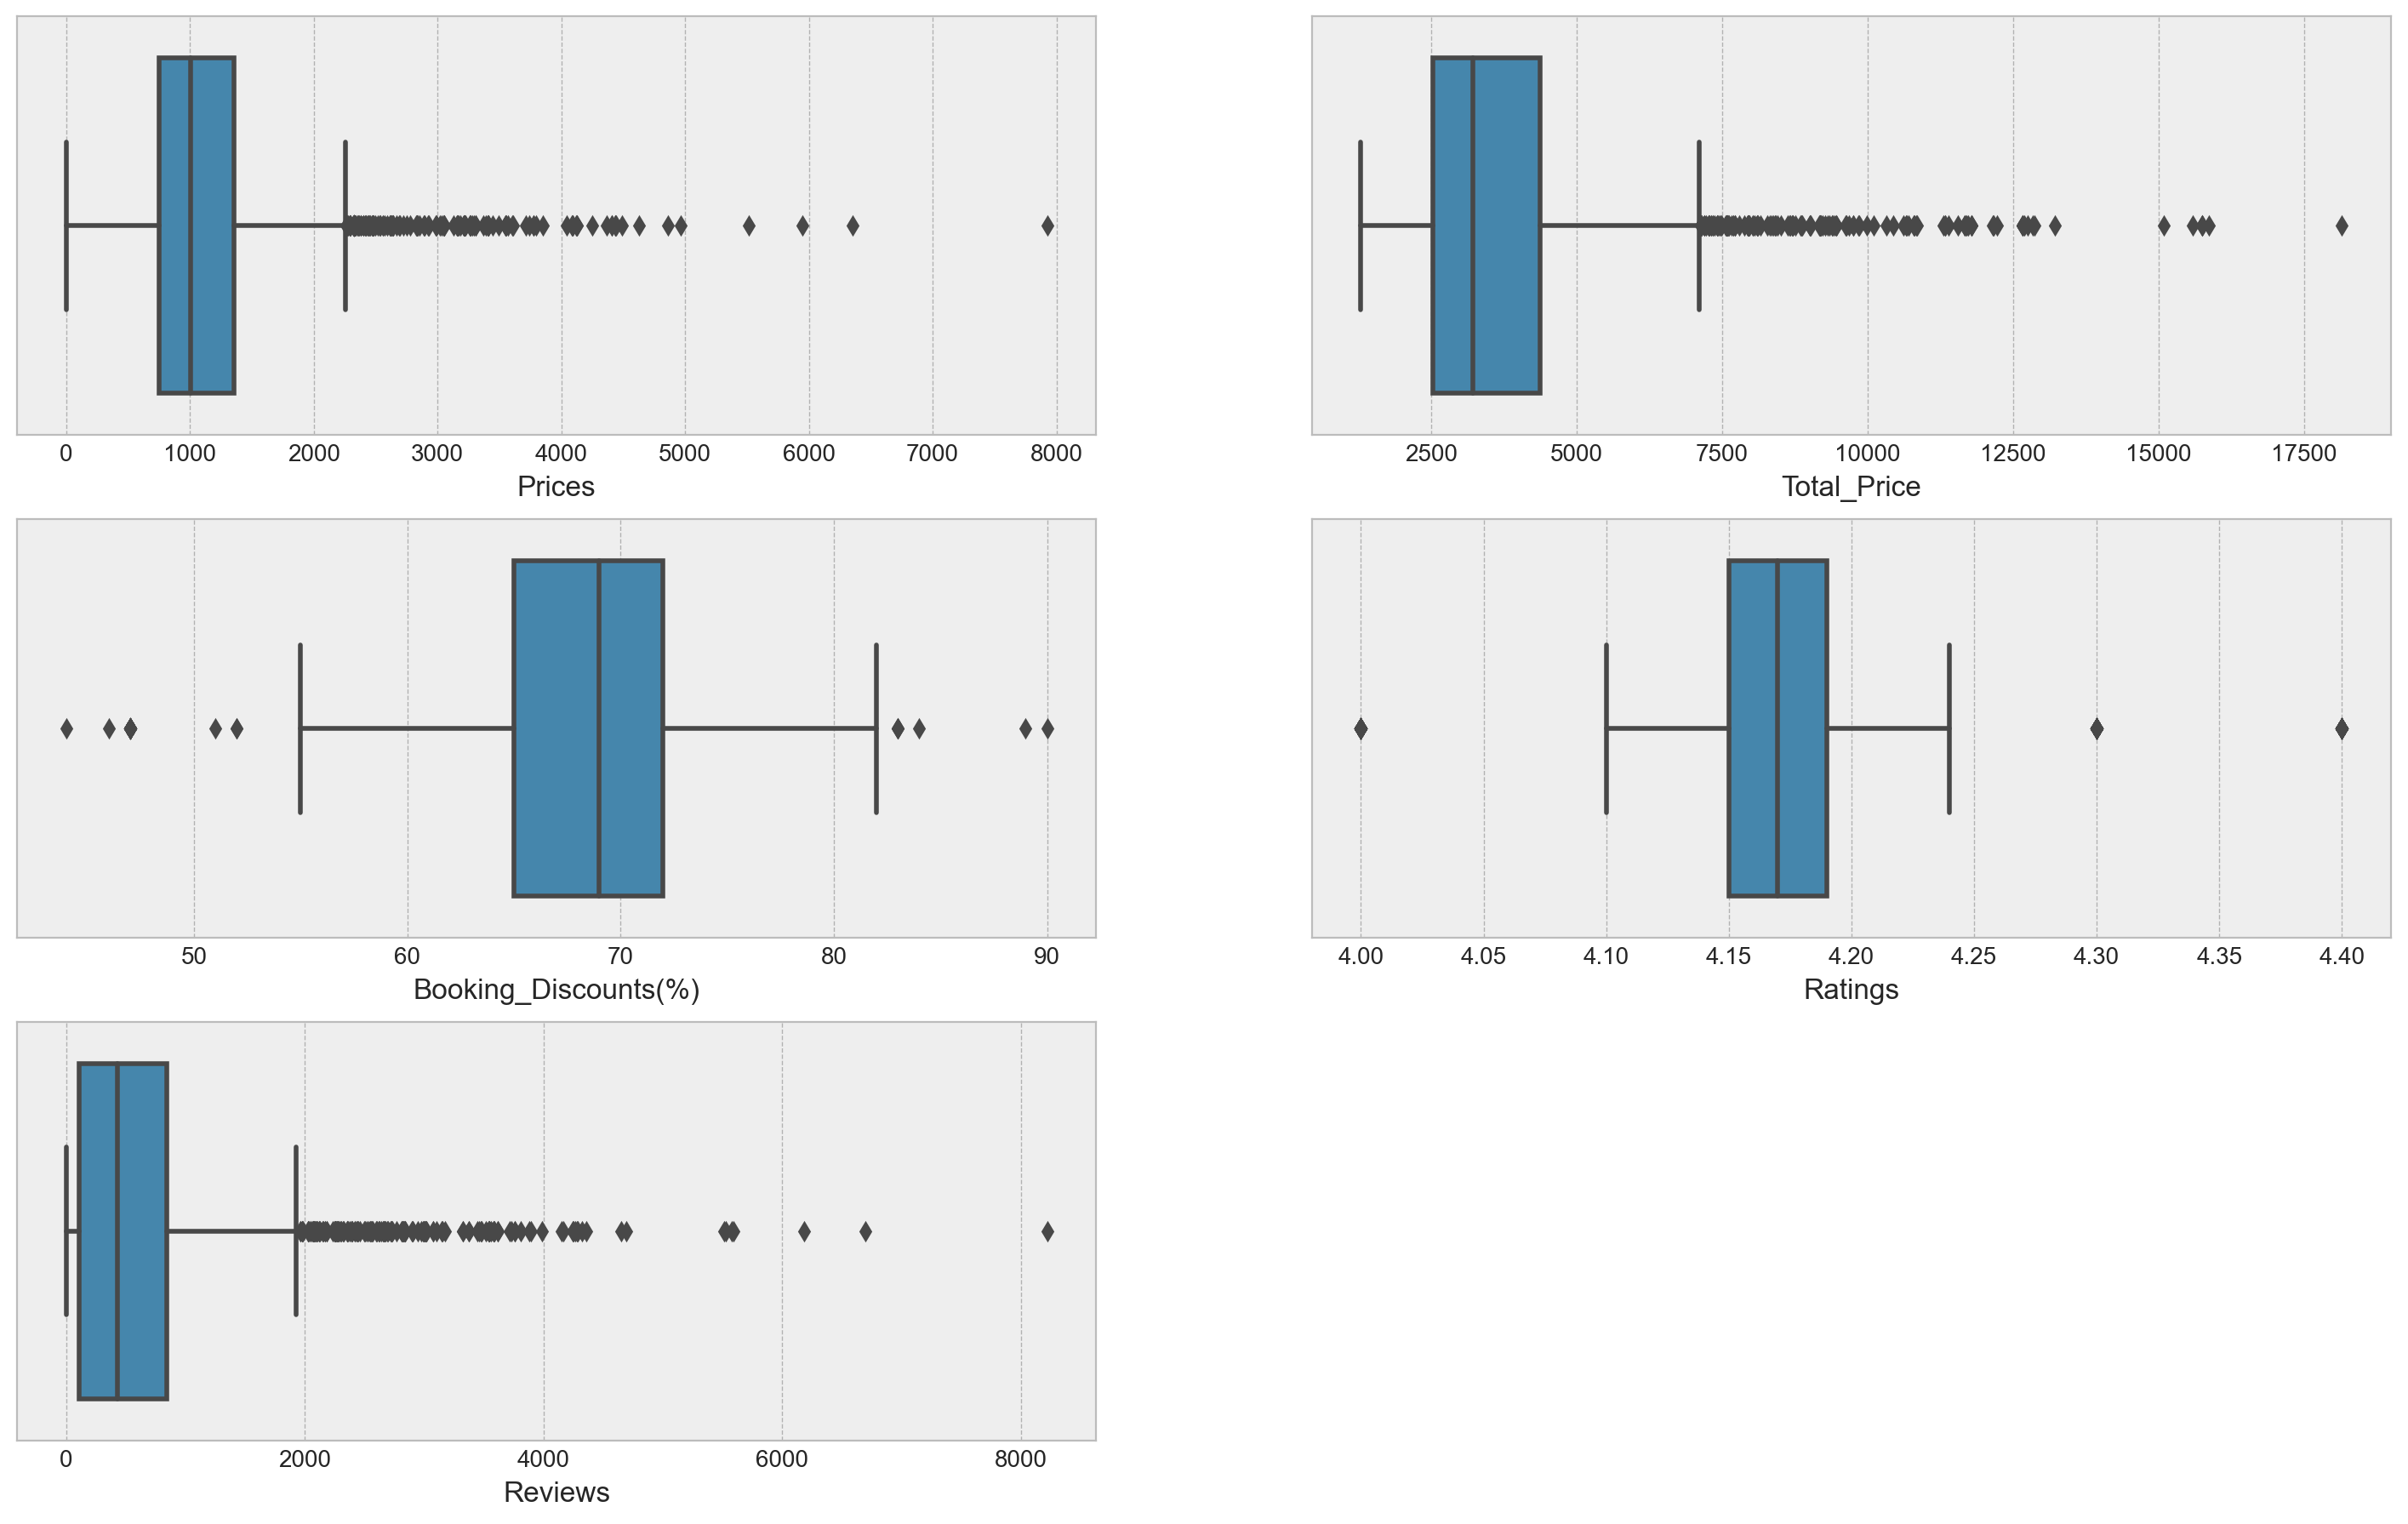

In [15]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=Hotels_df,x='Prices')
            
plt.subplot(422)
sns.boxplot(data=Hotels_df,x='Total_Price')
            
plt.subplot(423)
sns.boxplot(data=Hotels_df,x='Booking_Discounts(%)')
            
plt.subplot(424)
sns.boxplot(data=Hotels_df,x='Ratings')

plt.subplot(425)
sns.boxplot(data=Hotels_df,x='Reviews')

### From "Prices" column

In [16]:
# Removing outliers from "Prices" 
Q1,Q2,Q3 =tuple(Hotels_df.Prices.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_df.Prices.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

751.5 1008.0 1357.5


1008.0

606.0
2266.5
-157.5


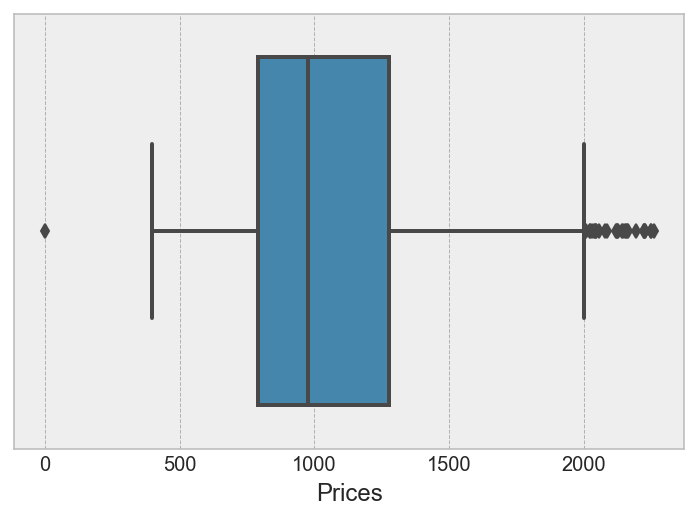

In [17]:
drop_index=Hotels_df[(Hotels_df.Prices>UL)].index
Hotels_df=Hotels_df.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_df,x='Prices');

### From "Total_Price" column

In [18]:
# Removing outliers from "Total_price" 
Q1,Q2,Q3 =tuple(Hotels_df.Total_Price.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_df.Total_Price.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

2571.75 3216.0 4065.25


3216.0

1493.5
6305.5
331.5


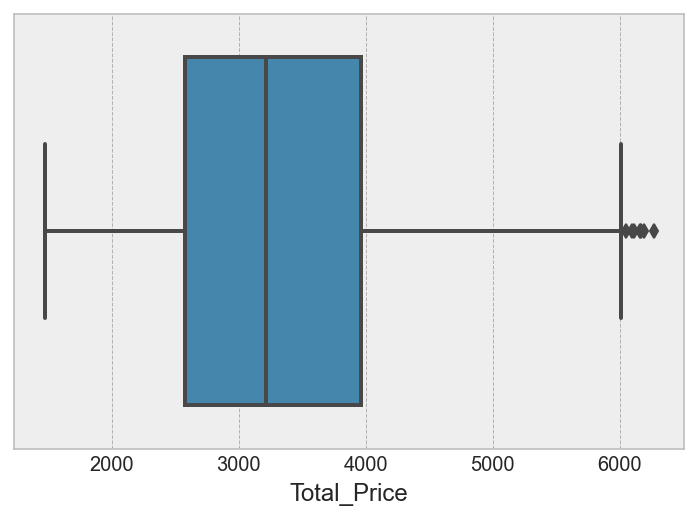

In [19]:
drop_index=Hotels_df[(Hotels_df.Total_Price>UL)].index
Hotels_df=Hotels_df.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_df,x='Total_Price');

###  From "Booking_Discounts(%)" column

In [20]:
# Removing outliers from "Booking_Discounts(%)" 
Q1,Q2,Q3 =tuple(Hotels_df['Booking_Discounts(%)'].quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_df['Booking_Discounts(%)'].median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

65.0 68.99 71.0


68.99

6.0
80.0
56.0


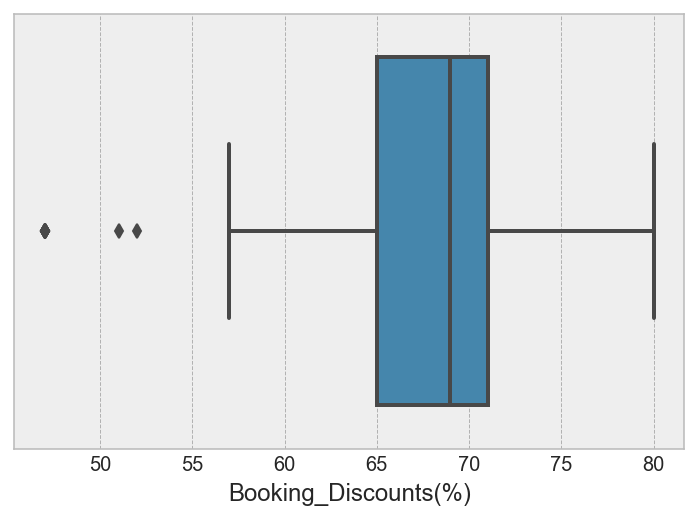

In [21]:
drop_index=Hotels_df[(Hotels_df['Booking_Discounts(%)']>UL)].index
Hotels_df=Hotels_df.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_df,x='Booking_Discounts(%)');

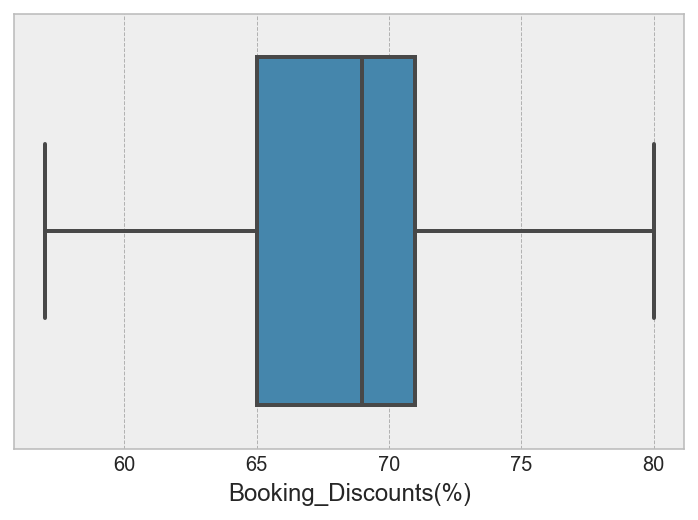

In [22]:
drop_index=Hotels_df[(Hotels_df['Booking_Discounts(%)']<LL)].index
Hotels_df=Hotels_df.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_df,x='Booking_Discounts(%)');

### From "Reviews" column

In [23]:
# Removing outliers from "Reviews"
Q1,Q2,Q3 =tuple(Hotels_df.Reviews.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
Hotels_df.Reviews.median()
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

95.5 423.0 823.5


423.0

728.0
1915.5
-996.5


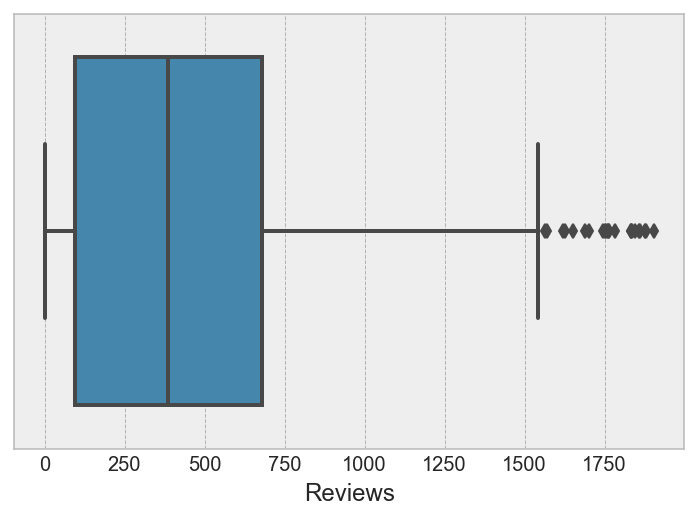

In [24]:
drop_index=Hotels_df[(Hotels_df.Reviews>UL)].index
Hotels_df=Hotels_df.drop(drop_index,axis=0)
sns.boxplot(data=Hotels_df,x='Reviews');

<AxesSubplot:xlabel='Prices', ylabel='Density'>

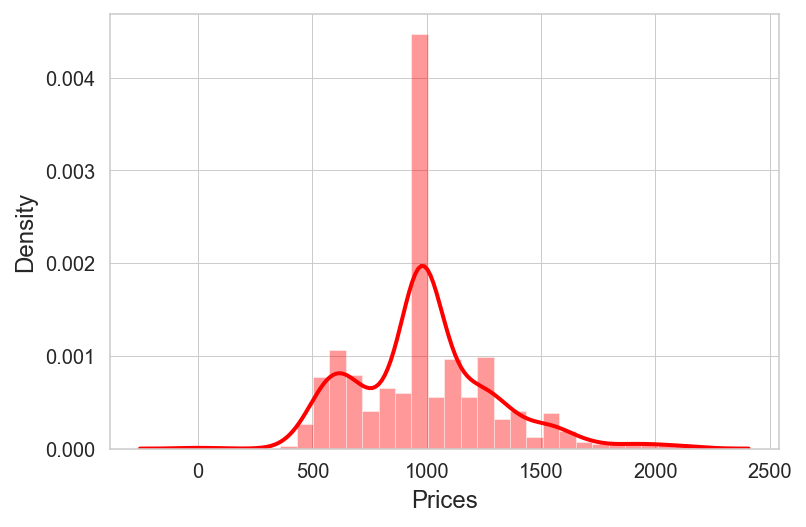

In [25]:
sns.set_style('whitegrid')
sns.distplot(Hotels_df['Prices'], kde = True, color ='red', bins = 30)

<AxesSubplot:xlabel='Total_Price', ylabel='Density'>

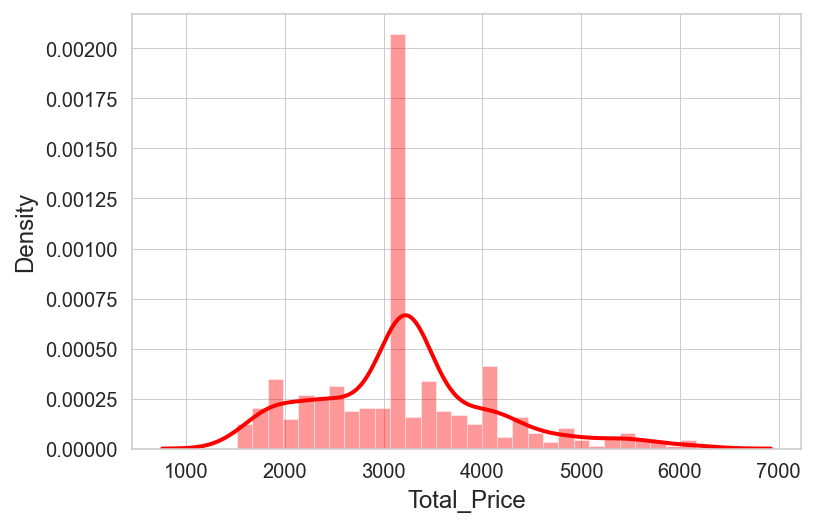

In [26]:
sns.set_style('whitegrid')
sns.distplot(Hotels_df['Total_Price'], kde = True, color ='red', bins = 30)

<AxesSubplot:xlabel='Booking_Discounts(%)', ylabel='Density'>

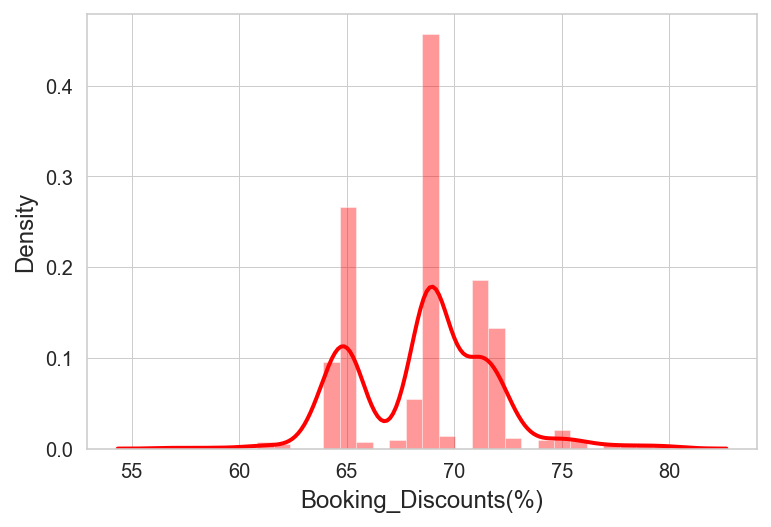

In [27]:
sns.set_style('whitegrid')
sns.distplot(Hotels_df['Booking_Discounts(%)'], kde = True, color ='red', bins = 30)

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

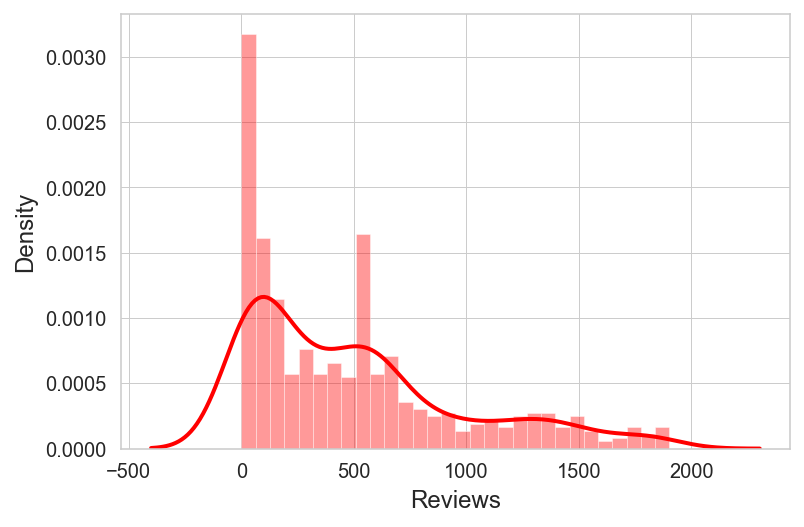

In [28]:
sns.set_style('whitegrid')
sns.distplot(Hotels_df['Reviews'], kde = True, color ='red', bins = 30)

In [29]:
Hotels_df.head()

,Hotels,Prices,Total_Price,Ratings,Booking_Discounts(%),Reviews,Facilities,Address,Informations,City_Name
1,Capital O 86948 Hotel Sai Balaji,1040,2972,4.20,65.0,987.0,Reception,"Rajendra Nagar Suncity Hyderabad, Hyderabad",1k+ people booked this OYO in last 6 months,Hyderabad
15,SPOT ON 70822 Pnd Complex,899,4562,4.18,80.0,635.0,Hair Dryer,"India, Hyderabad",All staff vaccinated with 1st dose,Hyderabad
39,Capital O 73916 HOTEL SVR,1538,4395,4.18,65.0,30.0,Parking facility,"Near Bharath pertol pump, Old Hafeezpet, Hyder...",NaN,Hyderabad
48,OYO Townhouse 710 Hotel Regal,632,2255,4.18,71.0,532.0,Parking facility,"Nampally station road, Adj Lane Metro Foot Wea...",2 people booked this hotel in last 30 mins,Hyderabad
61,Flagship 66733 Hotel Fortune Bliss,503,1852,4.18,72.0,385.0,Parking facility,"Shamshabad, Hyderabad",900+ people booked this OYO in last 6 months,Hyderabad


In [30]:
Hotels_df.duplicated().sum()

0

In [31]:
Hotels_df.shape

(577, 10)

In [32]:
Hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 204
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotels                576 non-null    object 
 1   Prices                577 non-null    int32  
 2   Total_Price           577 non-null    int32  
 3   Ratings               577 non-null    float64
 4   Booking_Discounts(%)  577 non-null    float64
 5   Reviews               577 non-null    float64
 6   Facilities            575 non-null    object 
 7   Address               576 non-null    object 
 8   Informations          359 non-null    object 
 9   City_Name             577 non-null    object 
dtypes: float64(3), int32(2), object(5)
memory usage: 45.1+ KB


## Data Visualization:

### (1) Univariant Analysis

### Bar plot

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='count'>

Text(0.5, 1.0, 'No. of Hotels per city')

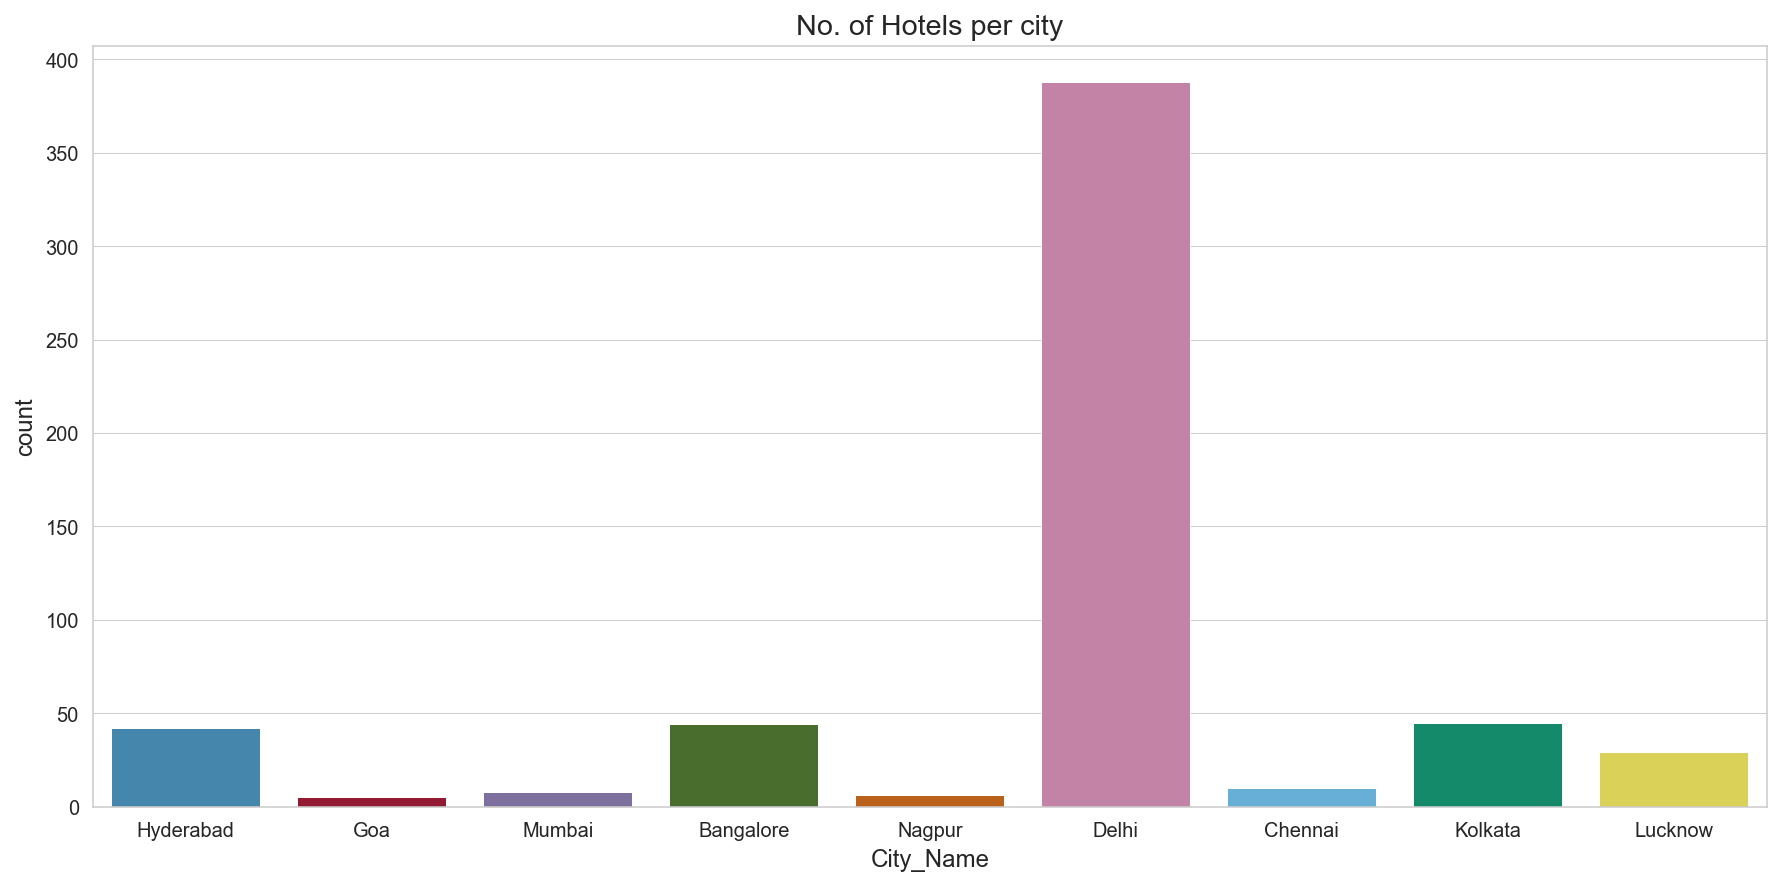

In [33]:
plt.figure(figsize=(15,7))

sns.countplot(x = "City_Name", data = Hotels_df)

plt.title("No. of Hotels per city")

plt.show()

**Conclusion:** 
- In this bar graph we can see that Delhi have more numbers of hotels
- And in Nagpur least numbers of are there

### Box plot

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Prices'>

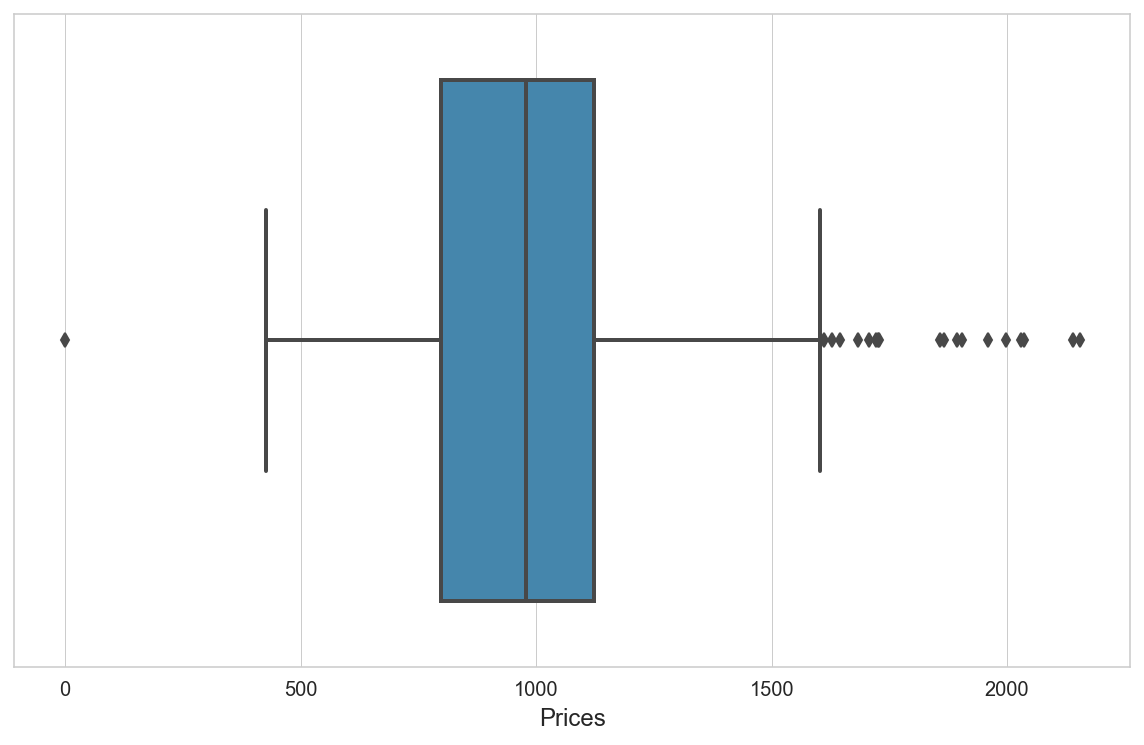

In [34]:
plt.figure(figsize=(10,6))

sns.boxplot(data=Hotels_df, x='Prices')

**Conclusion:**
- In these graph we can see that the maximum price of hotel is 7,924 Rupees.

### Histogram plot

<Figure size 720x432 with 0 Axes>

(array([  1.,   1.,  87.,  77., 233., 104.,  35.,  27.,   6.,   6.]),
 array([   0. ,  215.4,  430.8,  646.2,  861.6, 1077. , 1292.4, 1507.8,
        1723.2, 1938.6, 2154. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Prices')

Text(0, 0.5, 'No.of Hotels')

Text(0.5, 1.0, 'Price of OYO Hotels')

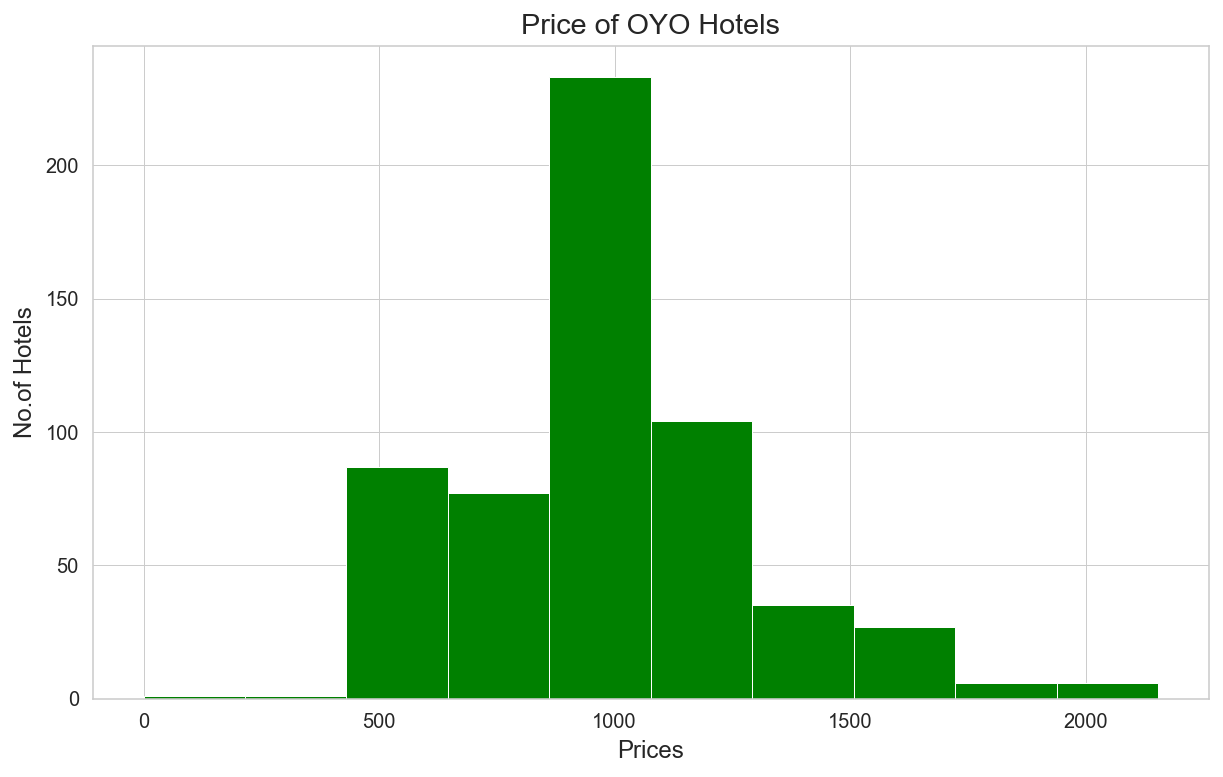

In [35]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_df['Prices'],color='green')

plt.xlabel("Prices")
plt.ylabel("No.of Hotels")

plt.title("Price of OYO Hotels")
plt.show()

**Conclusion:** 
- here we Observed see that maximum number of prices of hotels are under 1500 Rupees

### Histogram plot

<Figure size 720x432 with 0 Axes>

(array([ 18.,   0.,  19.,  80., 417.,  18.,   5.,  12.,   0.,   8.]),
 array([4.  , 4.04, 4.08, 4.12, 4.16, 4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Ratings')

Text(0, 0.5, 'No.of Hotels')

Text(0.5, 1.0, 'Ratings of Hotels')

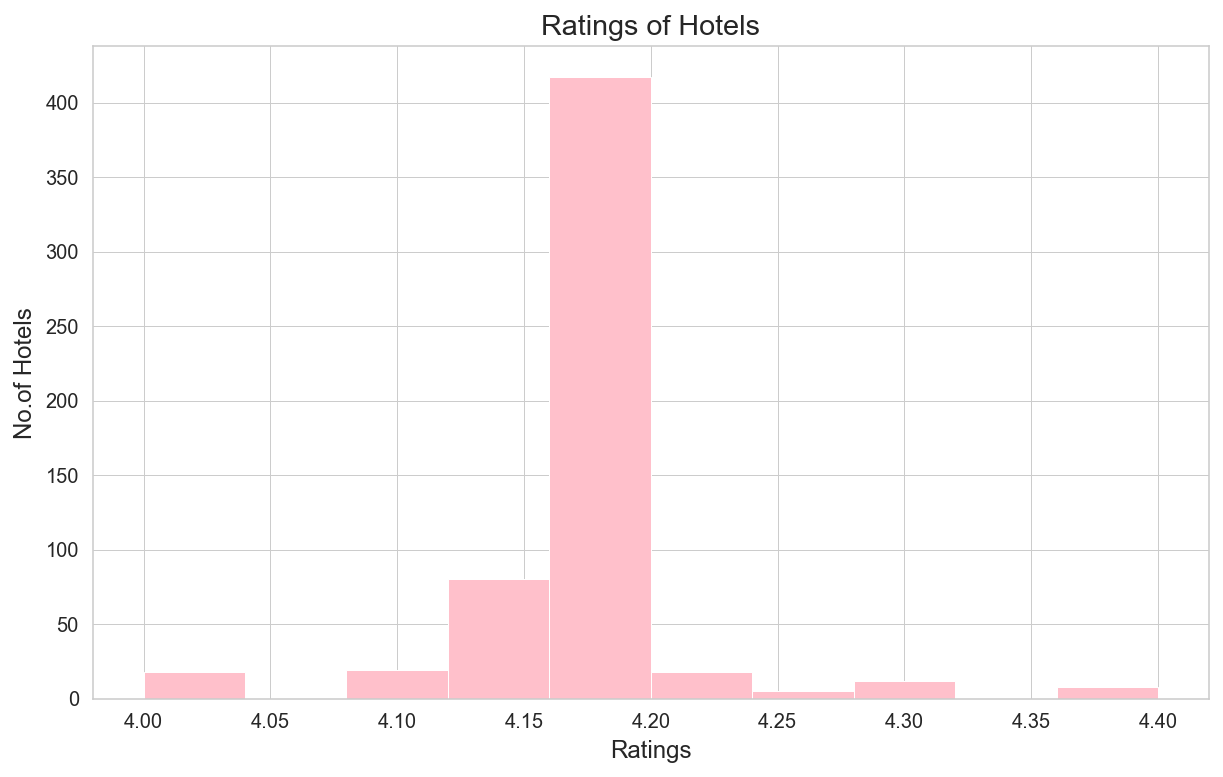

In [36]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_df['Ratings'],facecolor = 'pink')

plt.xlabel("Ratings")
plt.ylabel("No.of Hotels")

plt.title("Ratings of Hotels")
plt.show()

**Conclusion:** 
- here we can observed that maximum number of ratings of hotels are in the range of 4.11 to 4.20

### Histogram plot

<Figure size 720x432 with 0 Axes>

(array([217.,  70., 104.,  60.,  30.,  20.,  25.,  25.,  10.,  16.]),
 array([1.0000e+00, 1.9120e+02, 3.8140e+02, 5.7160e+02, 7.6180e+02,
        9.5200e+02, 1.1422e+03, 1.3324e+03, 1.5226e+03, 1.7128e+03,
        1.9030e+03]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Reviews')

Text(0, 0.5, 'No.of Hotels')

Text(0.5, 1.0, 'Reviews of OYO Hotels')

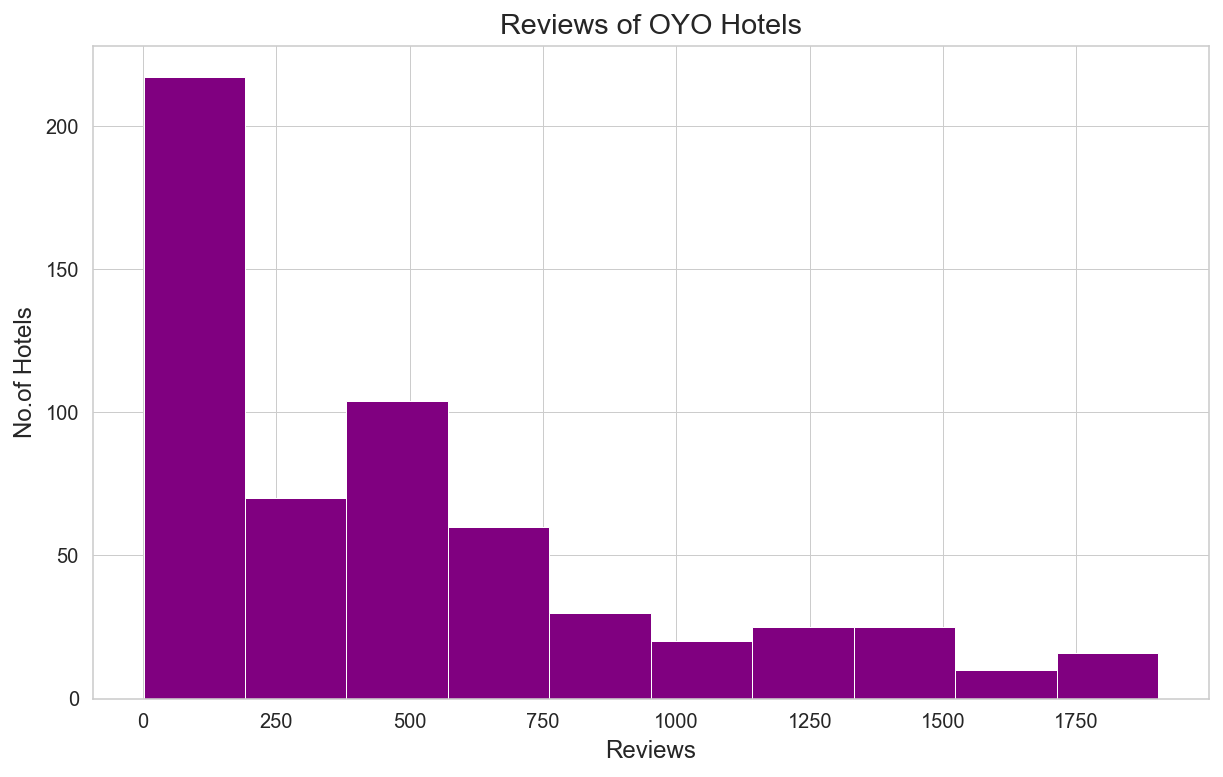

In [37]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_df['Reviews'],facecolor = 'purple')

plt.xlabel("Reviews")
plt.ylabel("No.of Hotels")

plt.title("Reviews of OYO Hotels")
plt.show()

**Conclusion:**
- Here maximum numbers of count of reviews are lie between 0 to 1000.

### Pie Plot

In [116]:
plt.figure(figsize=(13,7))
#Hotels = Hotels_df["City_Name"].value_counts()

#keys = Hotels.keys().to_list()

#counts = Hotels.to_list()

plt.pie(x = counts, labels = keys, autopct = "%1.1f%%")

circle = plt.Circle(xy=(0,0), radius=0.4, color="white")
plt.gcf()
plt.gca().add_artist(circle)

plt.title("OYO Hotels")
plt.show()

<Figure size 936x504 with 0 Axes>

NameError: name 'counts' is not defined

<Figure size 936x504 with 0 Axes>

**Conclusion:**
- here Delhi consists 31.3% hotels , which is the highest among the others cities.
- And Kolkata have second heighest percentage of value which is 12.4%.             
- And Nagpur have 4.0% of hotels which is the least percentage value among all of Hotels. 

### Histogram Plot

<Figure size 720x432 with 0 Axes>

(array([  2.,   3.,   2., 163.,  28., 208., 146.,  13.,   6.,   6.]),
 array([57. , 59.3, 61.6, 63.9, 66.2, 68.5, 70.8, 73.1, 75.4, 77.7, 80. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Discounts(%)')

Text(0, 0.5, 'No.of Hotels')

Text(0.5, 1.0, 'Discounts(%) of Hotels')

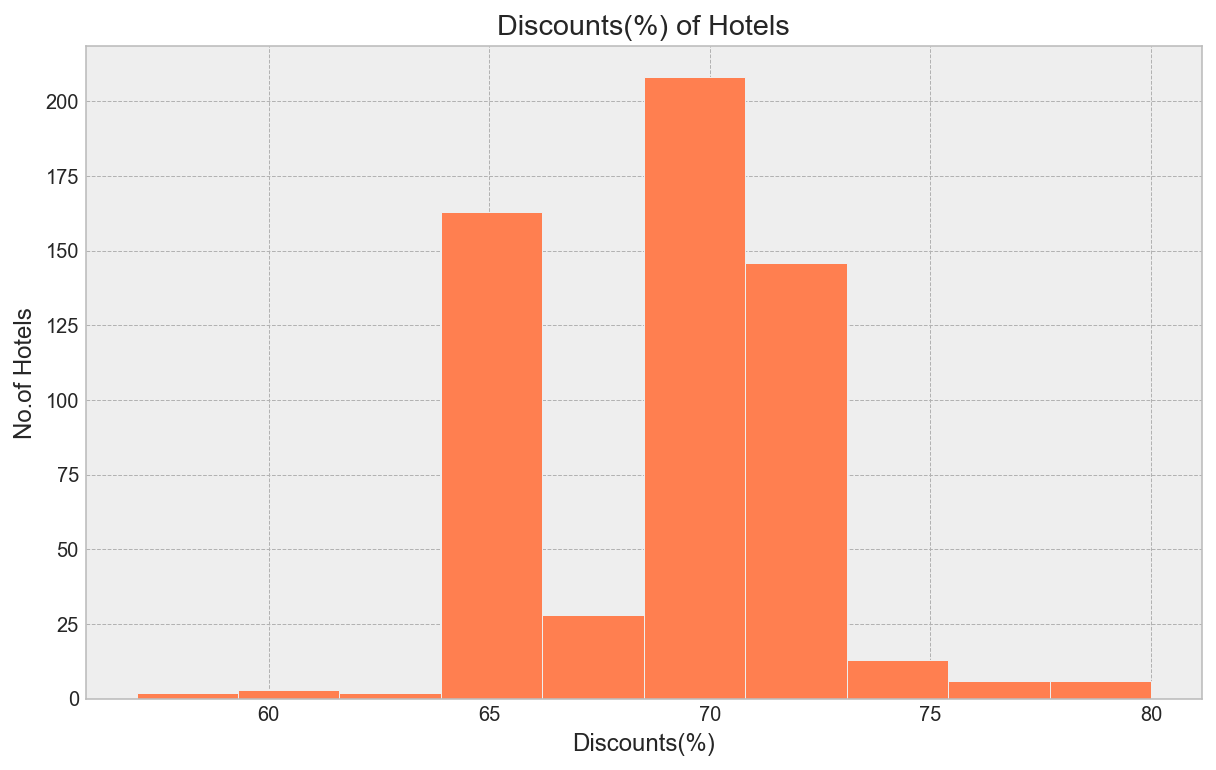

In [114]:
plt.figure(figsize=(10,6))
plt.hist(Hotels_df['Booking_Discounts(%)'],facecolor = 'coral')

plt.xlabel("Discounts(%)")
plt.ylabel("No.of Hotels")

plt.title("Discounts(%) of Hotels")
plt.show()

**Conclusion:**
- the maximum hotels are giving discounts in between the range of 65% to 75 %

### Kde Plot

<AxesSubplot:ylabel='Density'>

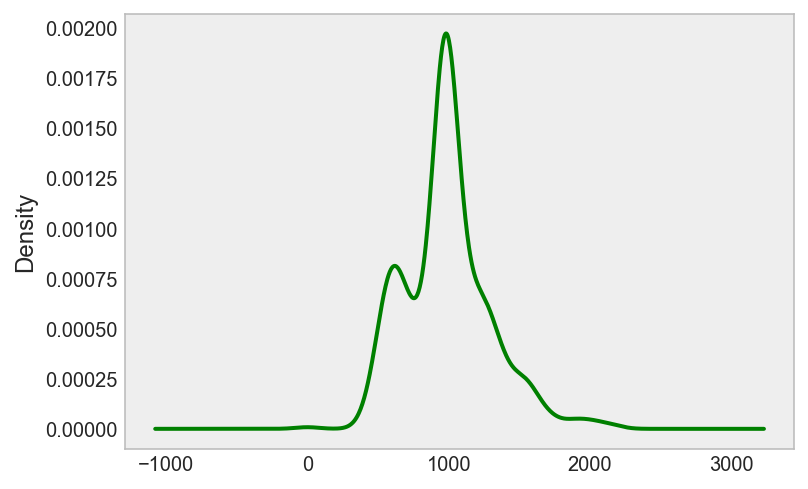

In [117]:
Hotels_df['Prices'].plot(kind='kde',color='green') ## numeric

plt.grid()

**Conclusion:**
- In these graph the maximum price is between (0 to 2,000).

### Kde Plot

<AxesSubplot:ylabel='Density'>

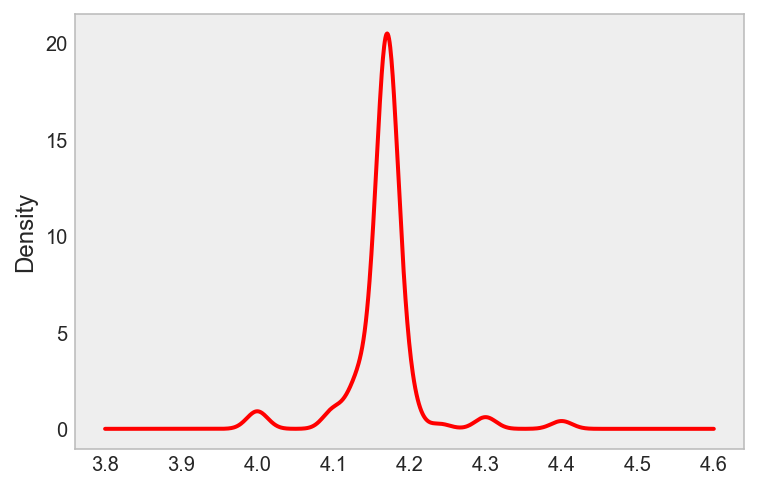

In [118]:
Hotels_df['Ratings'].plot(kind='kde',color='red') 

plt.grid()

**Conclusion:**
- These graph shows the maximum density of ratings is at 15
- and the peak value of ratings is aproxx. 4.17.

### Kde Plot

<AxesSubplot:ylabel='Density'>

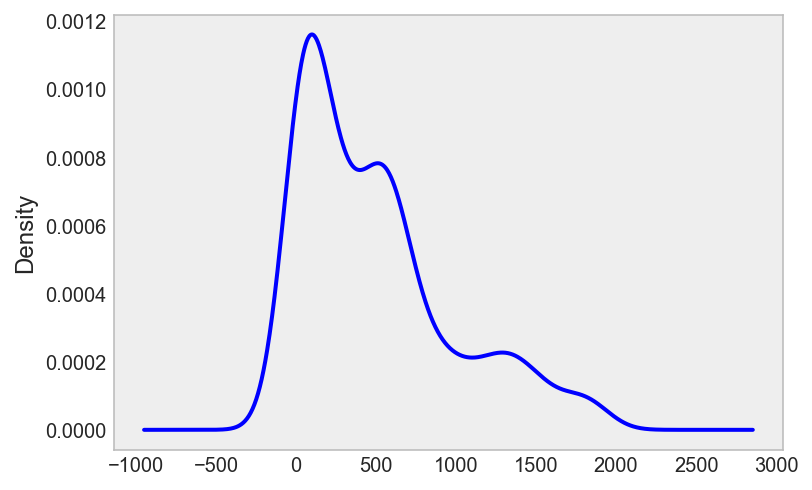

In [119]:
Hotels_df['Reviews'].plot(kind='kde',color='blue') ## numeric

plt.grid()

### Count Plot

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Ratings'>

Text(0.5, 1.0, 'Analysis on Ratings')

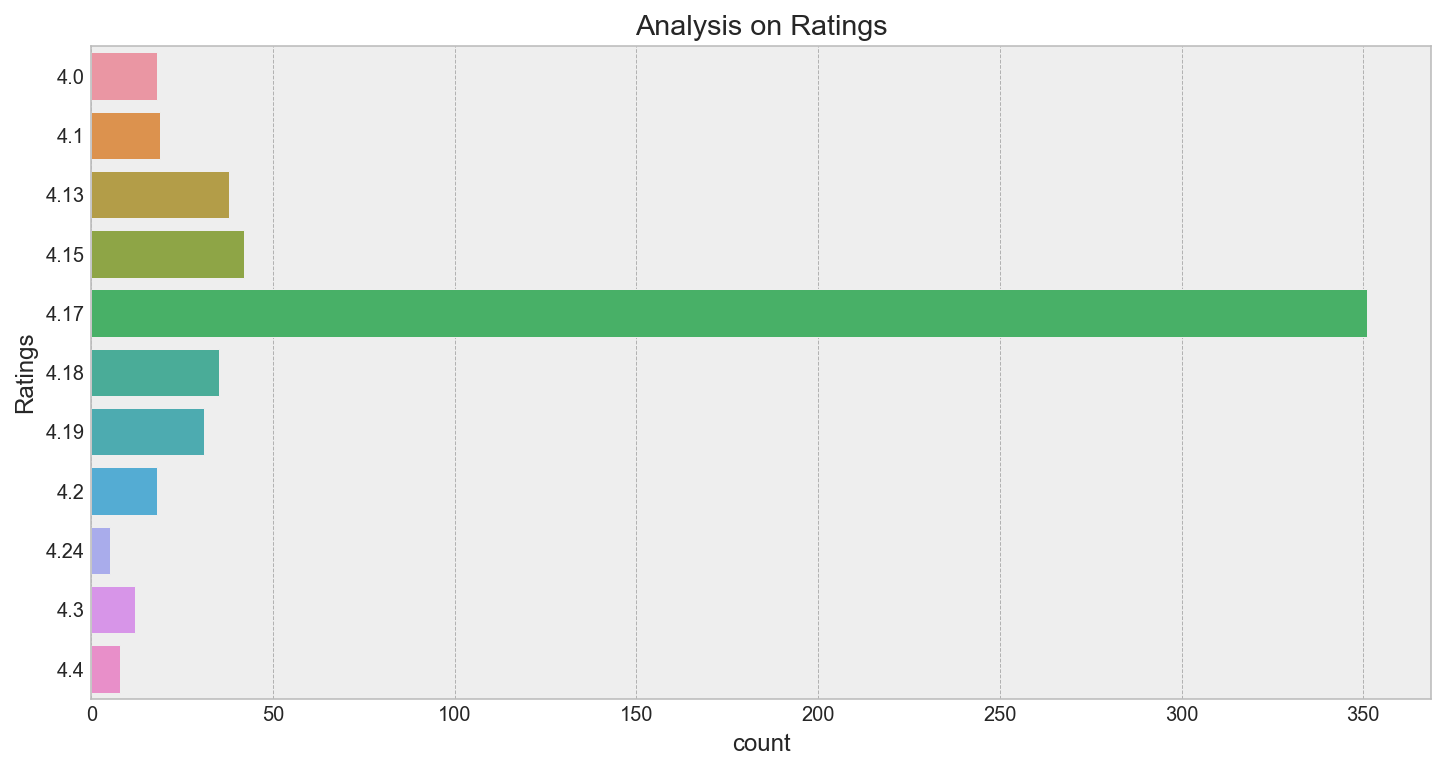

In [120]:
plt.figure(figsize=(12,6)) 

sns.countplot(y = "Ratings", data = Hotels_df)

plt.title("Analysis on Ratings")
plt.show()

1)4.17 is the first highest no'of count       
2)4.19 is the 2nd highest no'of count          
3)4.4 is the min no'of count

### Pie Plot

In [41]:
city_values = Hotels_df['City_Name'].value_counts()
loc_city = Hotels_df['City_Name'].value_counts().index
city_values

Delhi        388
Kolkata       45
Bangalore     44
Hyderabad     42
Lucknow       29
Chennai       10
Mumbai         8
Nagpur         6
Goa            5
Name: City_Name, dtype: int64

Text(0.5, 1.5, 'HIGHEST OYO ROOM \n IN WHICH CITY')

([<matplotlib.patches.Wedge at 0x1f7f99a1430>,
 [Text(-1.884979256491452, -1.1343955229975715, 'Delhi'),
  Text(2.1357408589621967, -0.5278361330559124, 'Kolkata'),
  Text(2.135740772477894, 0.527836482990263, 'Bangalore'),
  Text(1.6676306891841972, 1.4349243480027234, 'Hyderabad'),
  Text(1.0035786848540926, 1.9577614316628393, 'Lucknow'),
  Text(0.5684374717328305, 2.125295000871641, 'Chennai'),
  Text(0.35775429589488233, 2.1707169008806186, 'Mumbai'),
  Text(0.1914109739451892, 2.1916573270138184, 'Nagpur'),
  Text(0.05988412461459269, 2.19918482434268, 'Goa')],
 [Text(-1.028170503540792, -0.6187611943623116, '67%'),
  Text(1.1649495594339254, -0.2879106180304976, '8%'),
  Text(1.1649495122606692, 0.2879108089037798, '8%'),
  Text(0.9096167395550165, 0.7826860080014854, '7%'),
  Text(0.5474065553749595, 1.067869871816094, '5%'),
  Text(0.3100568027633621, 1.1592518186572585, '2%'),
  Text(0.19513870685175397, 1.1840274004803373, '1%'),
  Text(0.10440598578828501, 1.195449451098446

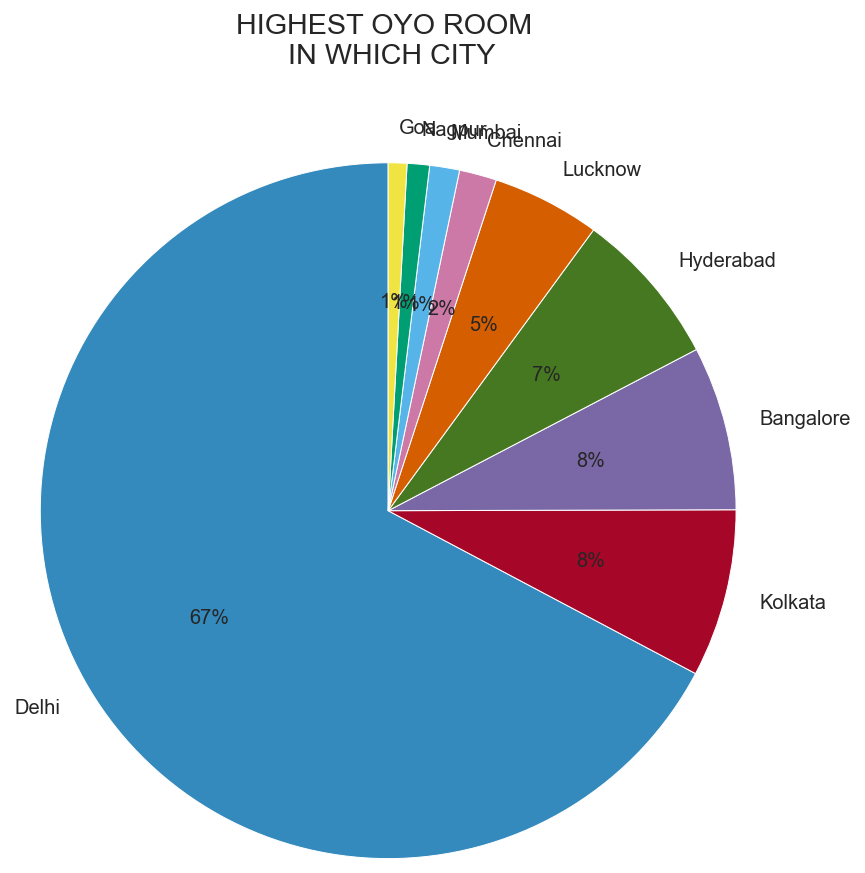

In [45]:
plt.title("HIGHEST OYO ROOM \n IN WHICH CITY", y = 1.5, bbox={'facecolor':'w', 'pad':5 })
plt.pie(city_values[:9], labels = loc_city[:9], autopct = "%1.0f%%", radius = 2, startangle = 90)

In [121]:
plt.figure(figsize=(10,6))
#Hotels = Hotels_df["Facilities"].value_counts()

#keys = Hotels.keys().to_list()

#counts = Hotels.to_list()

plt.pie(x = counts, labels = keys, autopct = "%1.1f%%")

circle = plt.Circle(xy=(0,0), radius=0.4, color="white")
plt.gcf()
plt.gca().add_artist(circle)

plt.title("OYO Hotels")
plt.show()

<Figure size 720x432 with 0 Axes>

NameError: name 'counts' is not defined

<Figure size 720x432 with 0 Axes>

###  (2)  Bivariate Analysis

### Box Plot

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='Booking_Discounts(%)'>

Text(0.5, 1.0, 'OYO Hotels Discounts Analysis')

Text(0, 0.5, 'Discounts(%)')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Nagpur'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Lucknow')])

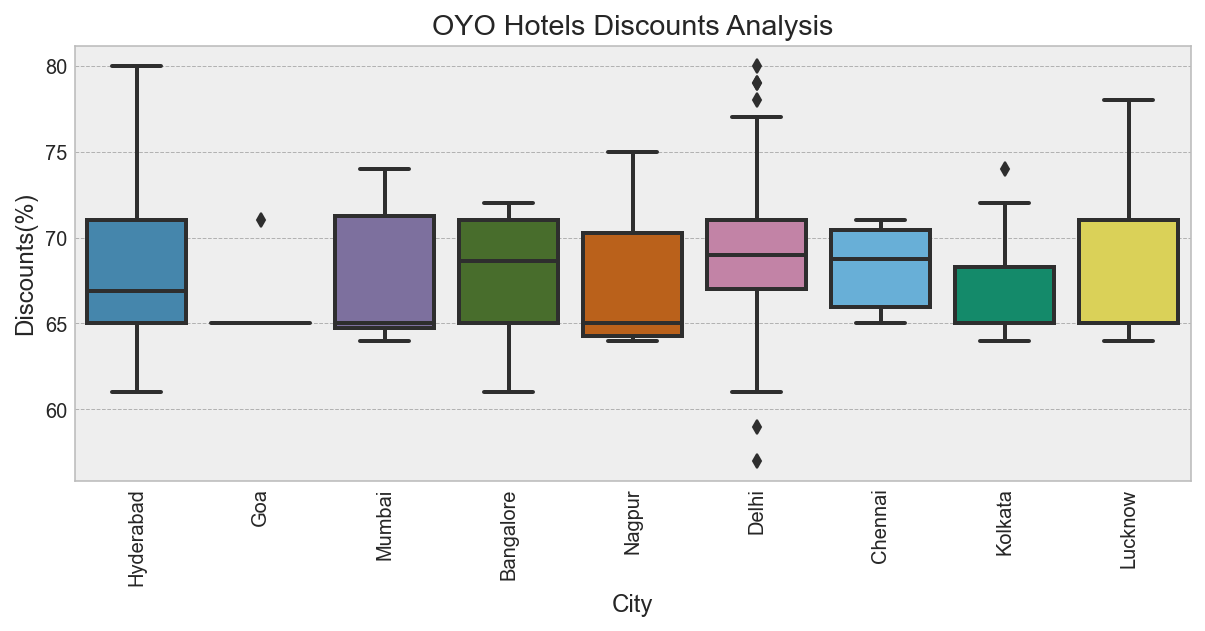

In [122]:
plt.figure(figsize=(10,4)) 

sns.boxplot(x="City_Name", y="Booking_Discounts(%)", data=Hotels_df)
plt.title('OYO Hotels Discounts Analysis')
plt.ylabel('Discounts(%)')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show()

1) Here we can see that discounts given by  hotels are in the range of 65 to 75.

2) some hotels giving discount above to 80.

### Box Plot

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='Prices'>

Text(0.5, 1.0, 'OYO Hotels Price Analysis')

Text(0, 0.5, 'Prices')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Nagpur'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Lucknow')])

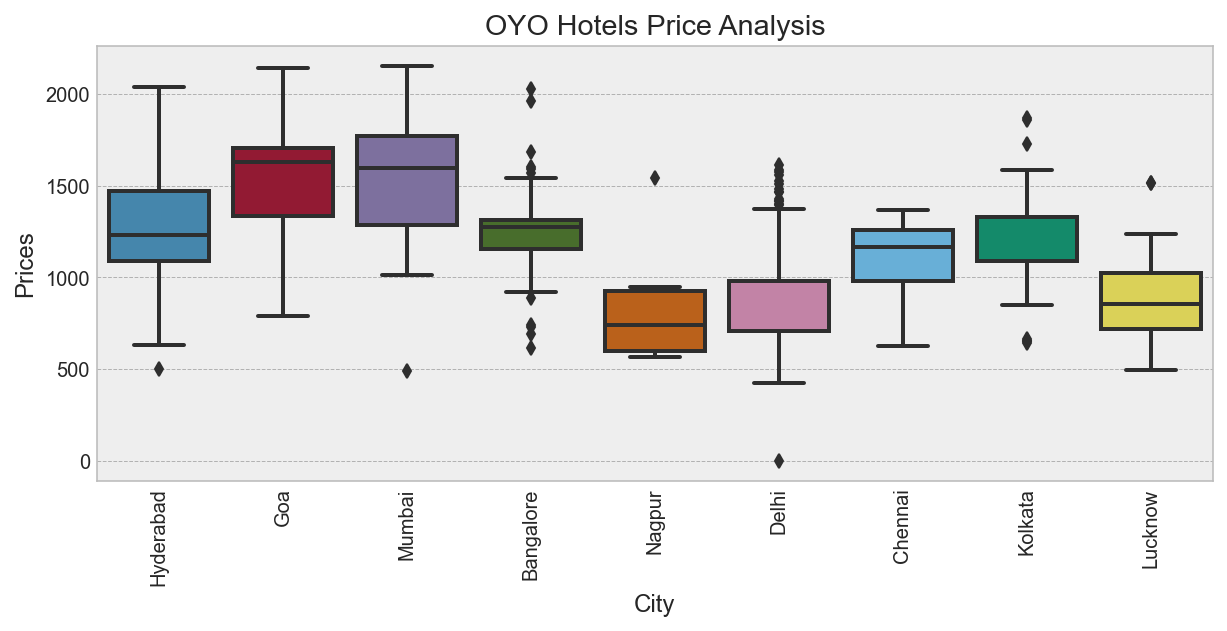

In [123]:
plt.figure(figsize=(10,4)) 

sns.boxplot(x="City_Name", y="Prices", data=Hotels_df)
plt.title('OYO Hotels Price Analysis')
plt.ylabel('Prices')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show()

### Box Plot

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='Total_Price'>

Text(0.5, 1.0, 'OYO Hotels Price Analysis')

Text(0, 0.5, 'Prices')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Nagpur'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Lucknow')])

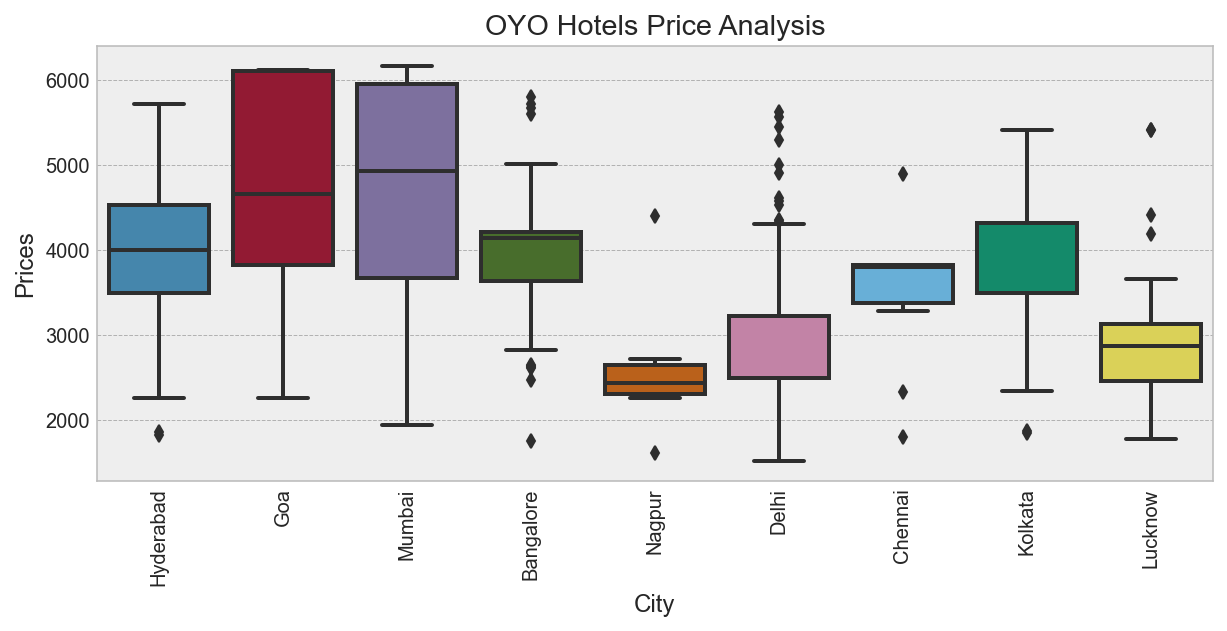

In [124]:
plt.figure(figsize=(10,4)) 

sns.boxplot(x="City_Name", y="Total_Price", data=Hotels_df)
plt.title('OYO Hotels Price Analysis')
plt.ylabel('Prices')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.show()

1)In goa the price of oyo is high           
2)In nagpur and lucknow the price is low 

### Bar plot

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='Prices'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Nagpur'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Lucknow')])

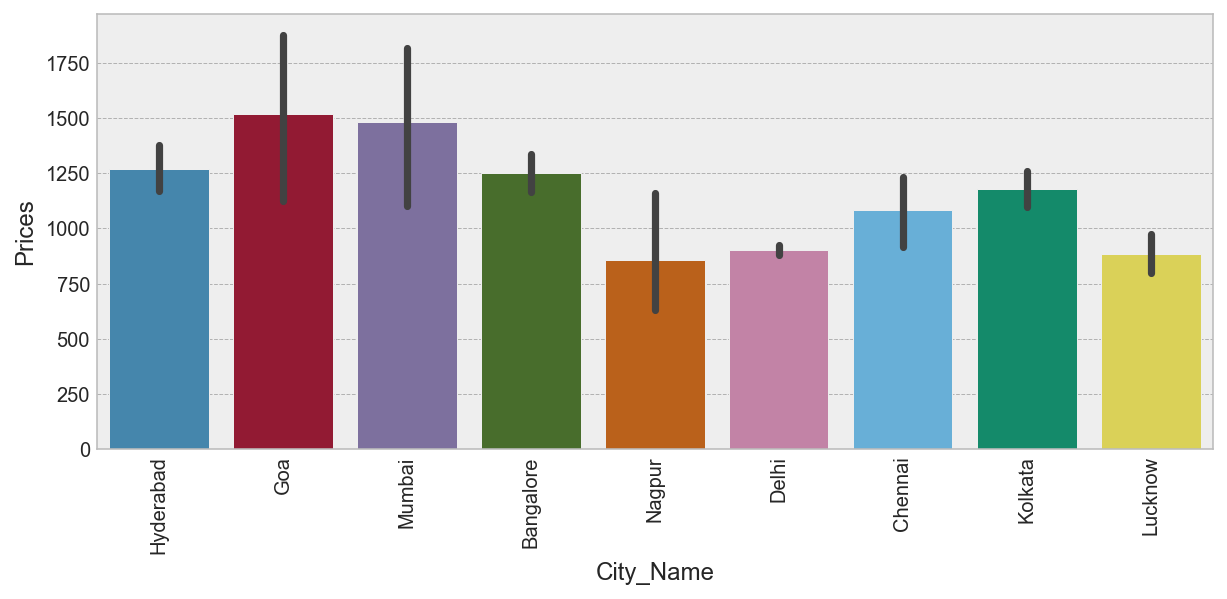

In [125]:
plt.figure(figsize=(10,4)) 

sns.barplot(x='City_Name', y='Prices', data=Hotels_df)
plt.xticks(rotation = 90)
plt.show()

### Bar Plot

<Figure size 720x288 with 0 Axes>

<AxesSubplot:xlabel='City_Name', ylabel='Total_Price'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Goa'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Nagpur'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Lucknow')])

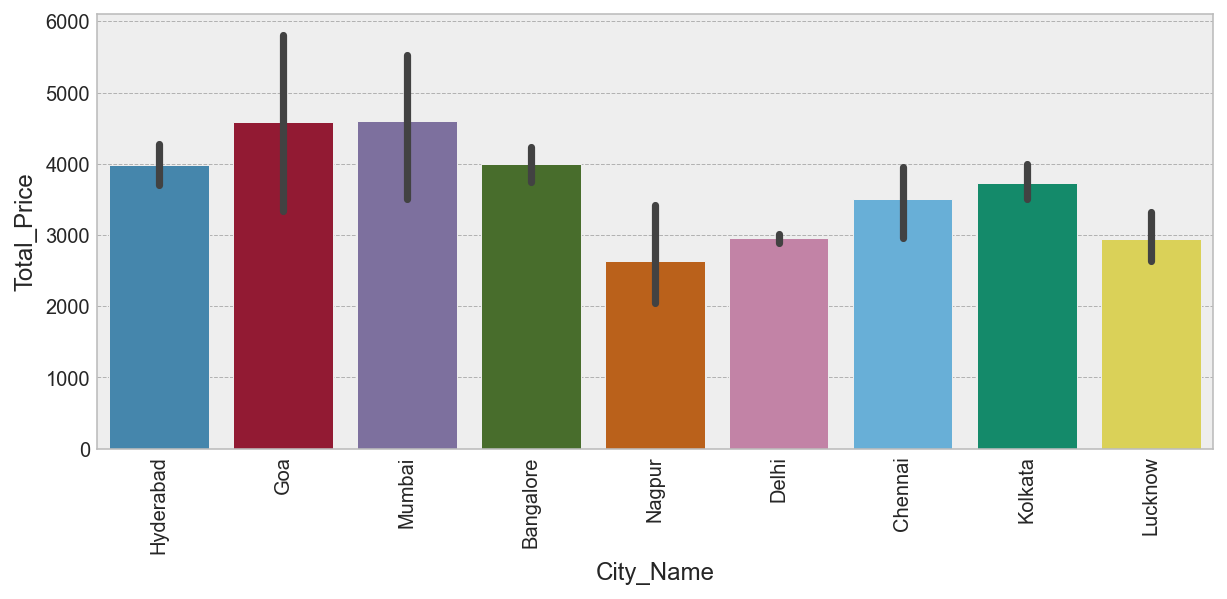

In [126]:
plt.figure(figsize=(10,4)) 

sns.barplot(x='City_Name', y='Total_Price', data=Hotels_df)
plt.xticks(rotation = 90)
plt.show()

1)the price range of goa is 2400       
2)lucknow and nagpur has low range of 900

### Scatter Plot

<Figure size 1800x576 with 0 Axes>

<AxesSubplot:xlabel='Prices', ylabel='Booking_Discounts(%)'>

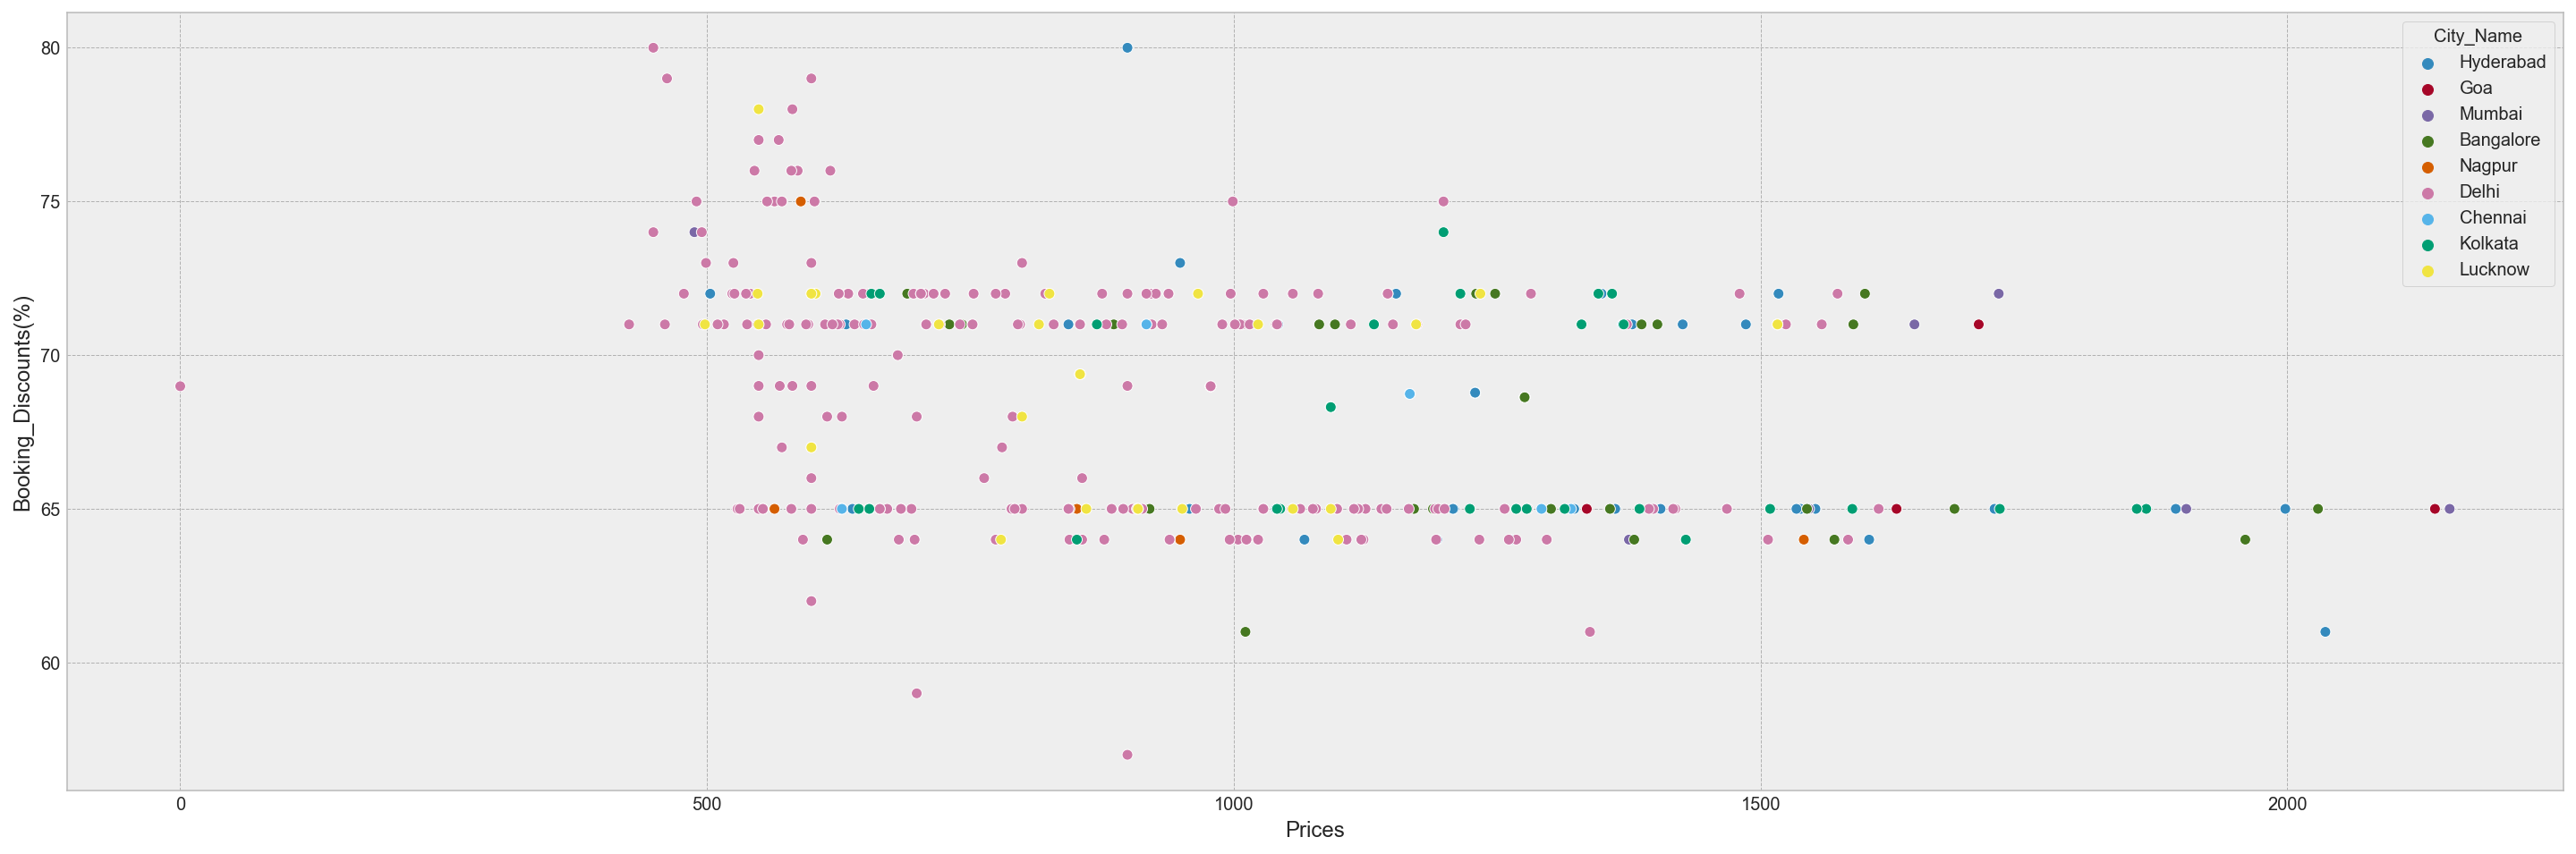

In [127]:
plt.figure(figsize=(25,8))

sns.scatterplot(Hotels_df["Prices"],Hotels_df["Booking_Discounts(%)"], hue = Hotels_df["City_Name"])

### Scatter Plot

<Figure size 1800x576 with 0 Axes>

<AxesSubplot:xlabel='Prices', ylabel='Ratings'>

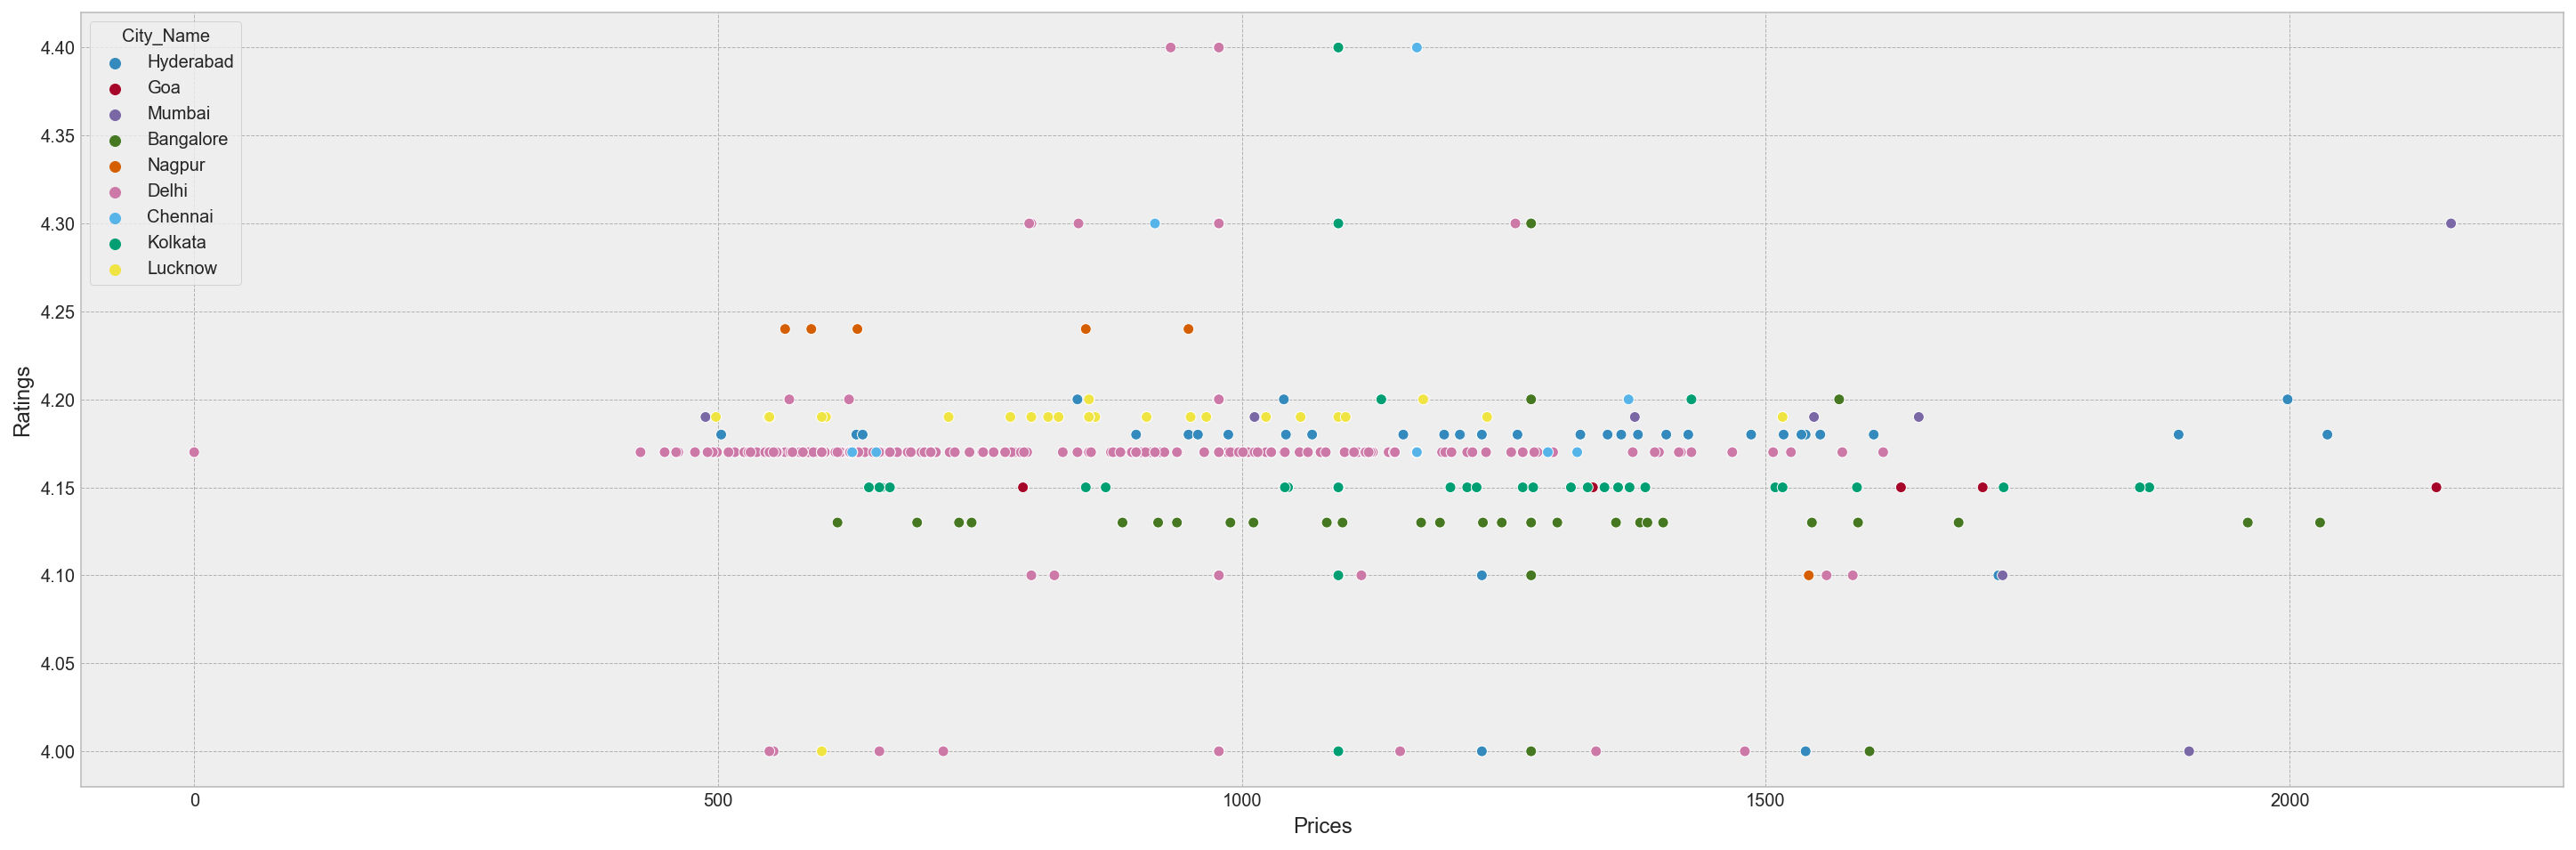

In [128]:
plt.figure(figsize=(25,8))

sns.scatterplot(Hotels_df["Prices"],Hotels_df["Ratings"], hue = Hotels_df["City_Name"])

### Scatter Plot

In [ ]:
plt.figure(figsize=(25,8))

sns.scatterplot(Hotels_df["Prices"],Hotels_df["Reviews"], hue = Hotels_df["City_Name"])

### (3) Multivariant Analysis

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(Hotels_df[['Prices', 'Ratings', 'Booking_Discounts(%)', 'Reviews']], figsize = (10,7))

plt.show()

In [ ]:
plt.figure(figsize=(10,6))    #Very useful plot to check correlation between numerical values 
sns.heatmap(Hotels_df.corr(), cmap = 'winter', annot=True); 
plt.show()